NAME- MOHIT KUMAR YADAV
SAP ID- 500122588

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv('/content/diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3) Show basic overview of the data like head, target, or any missing values

In [5]:


df.info()
df.describe()
print("Target variable distribution:\n", df['Outcome'].value_counts())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Target variable distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin            

5) Perform all basic EDA including all types of plots to show relation between features

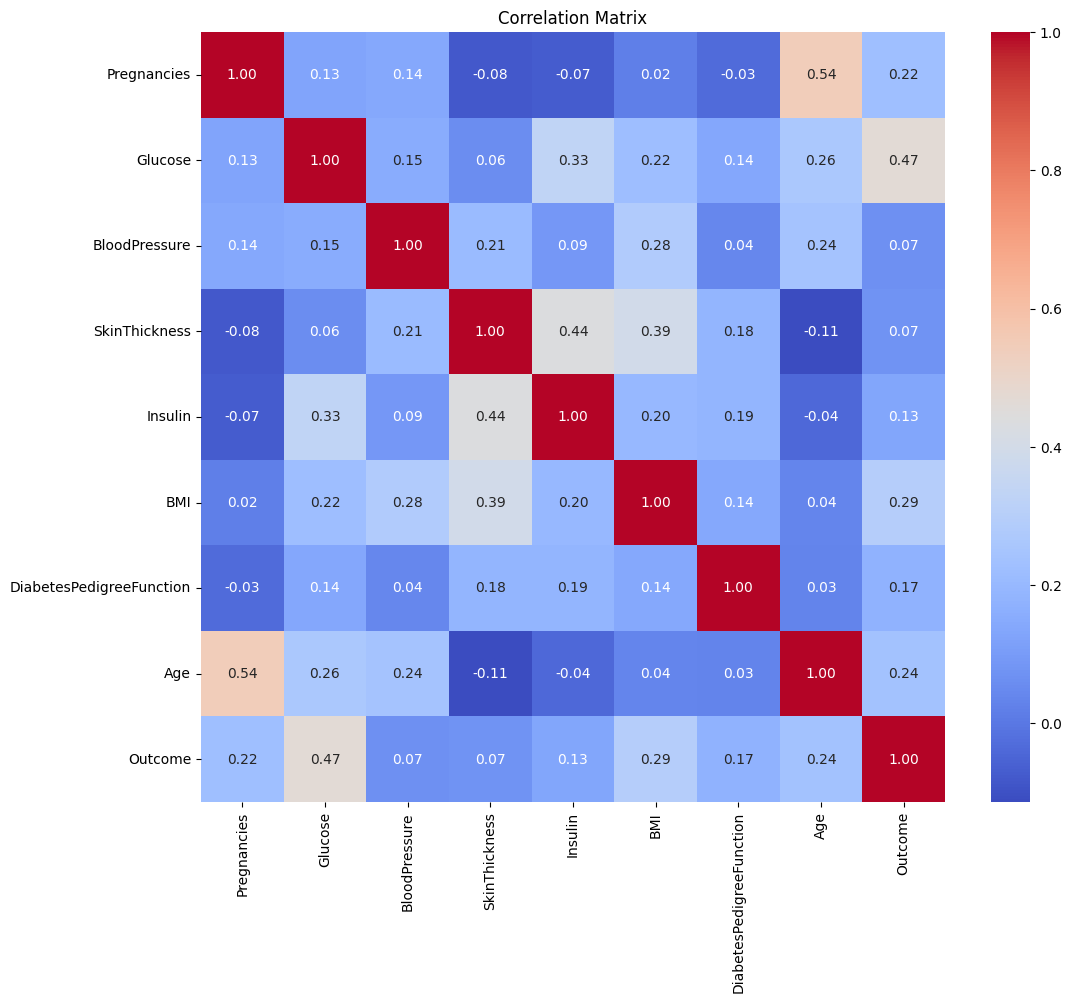

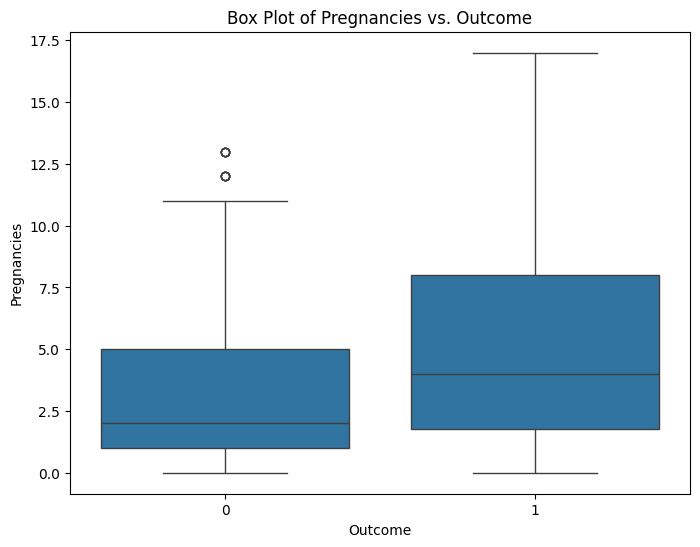

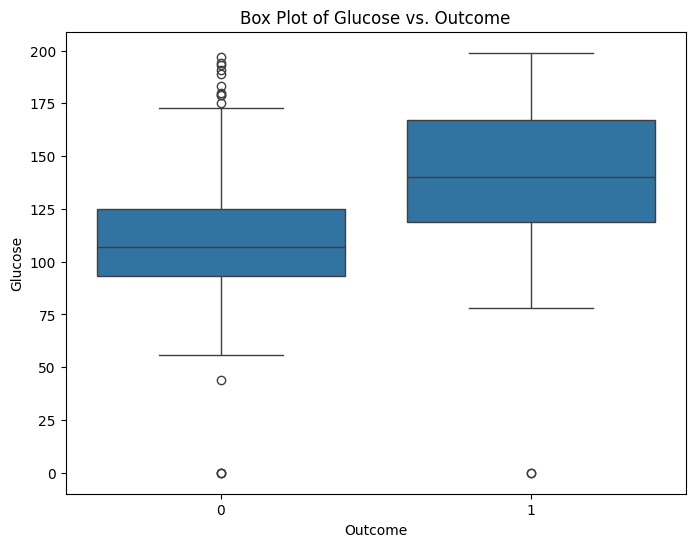

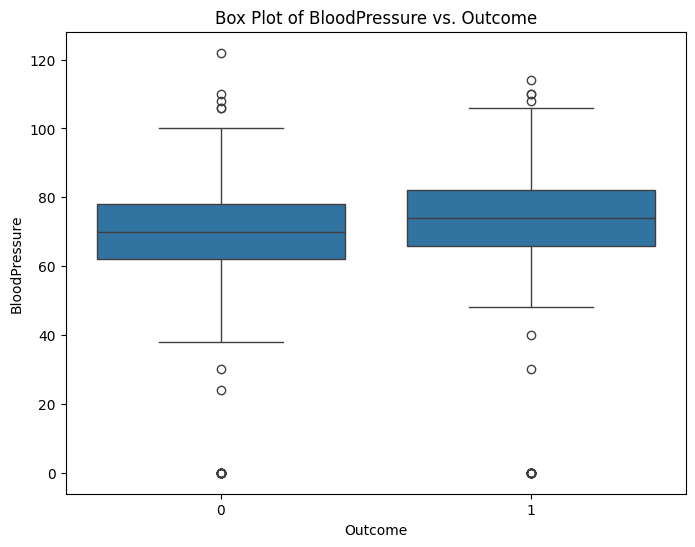

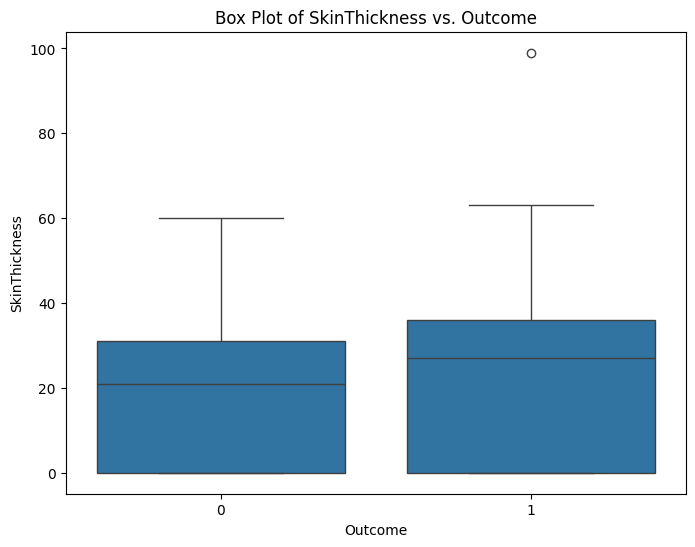

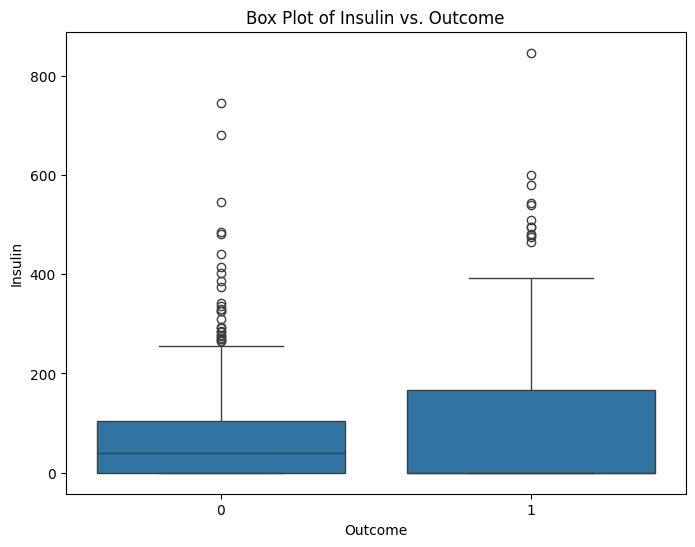

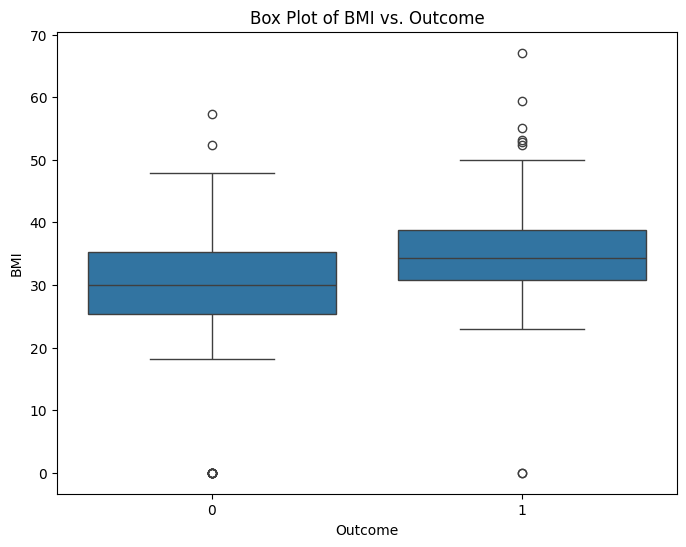

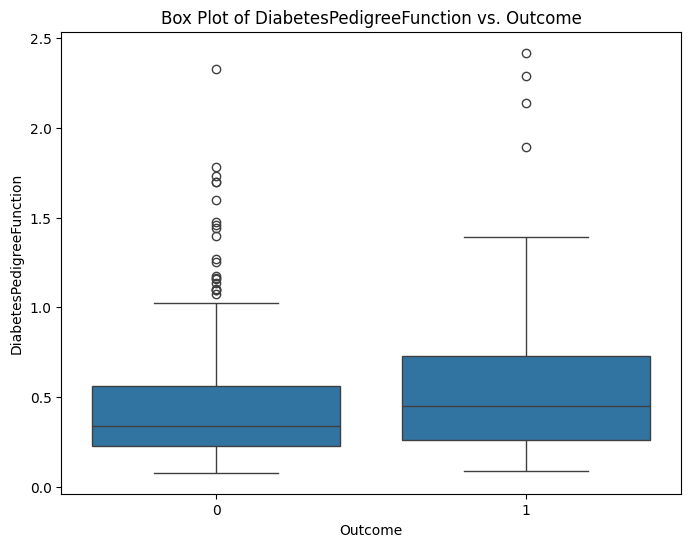

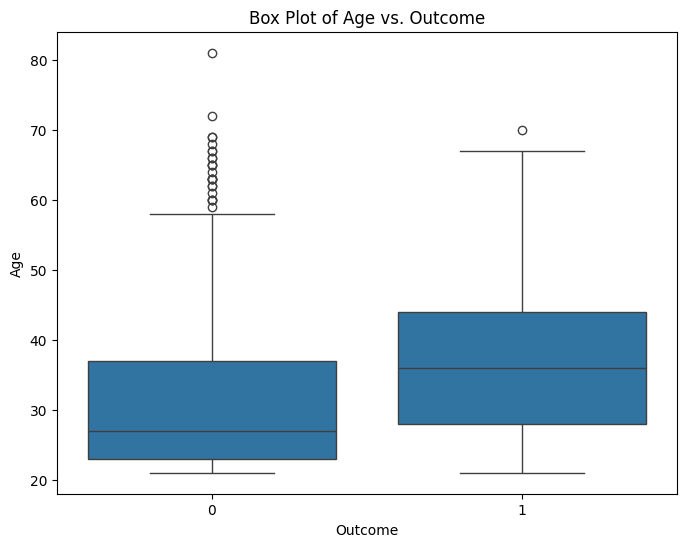

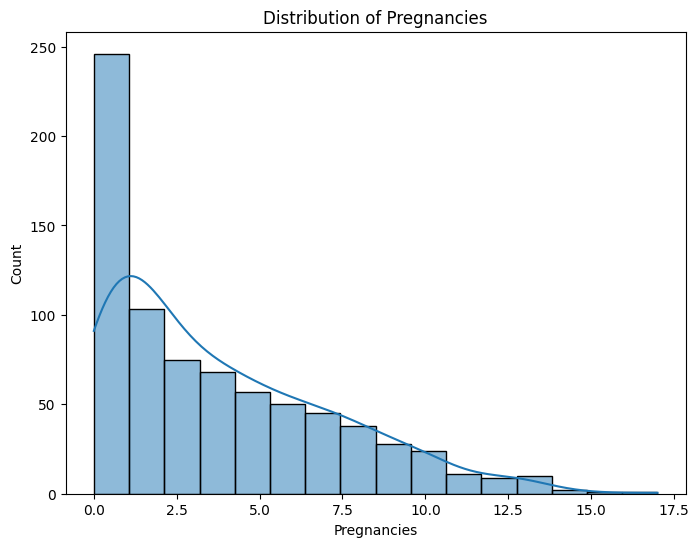

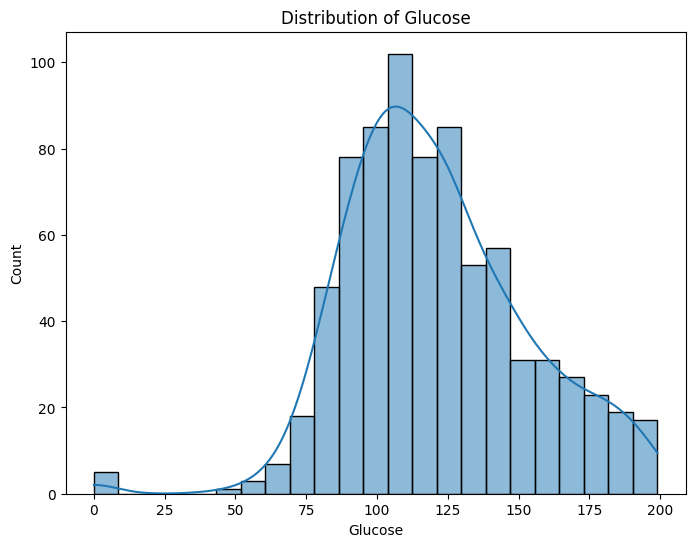

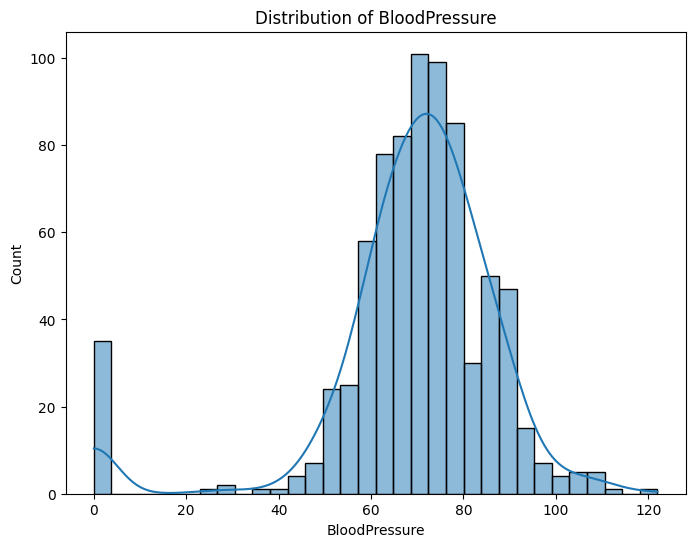

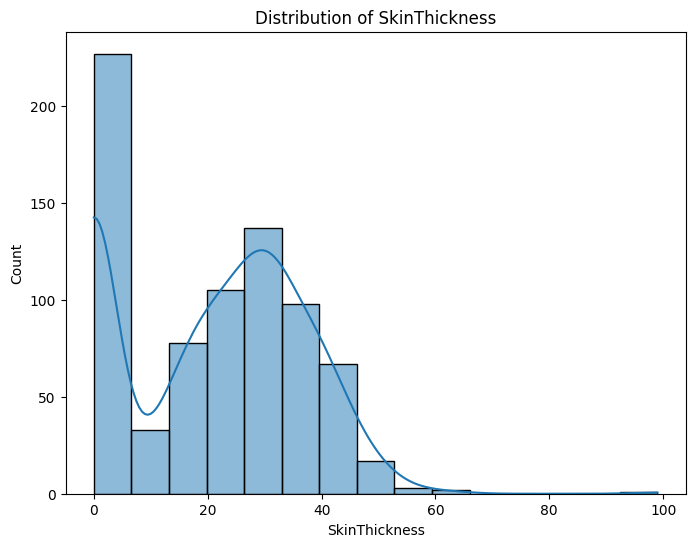

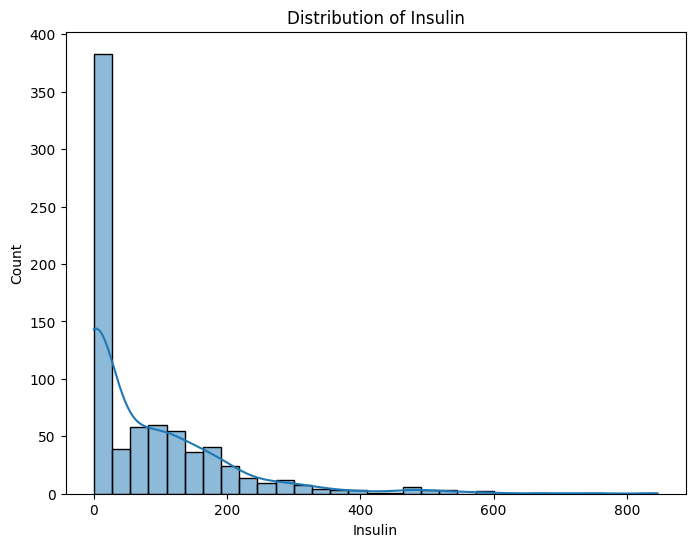

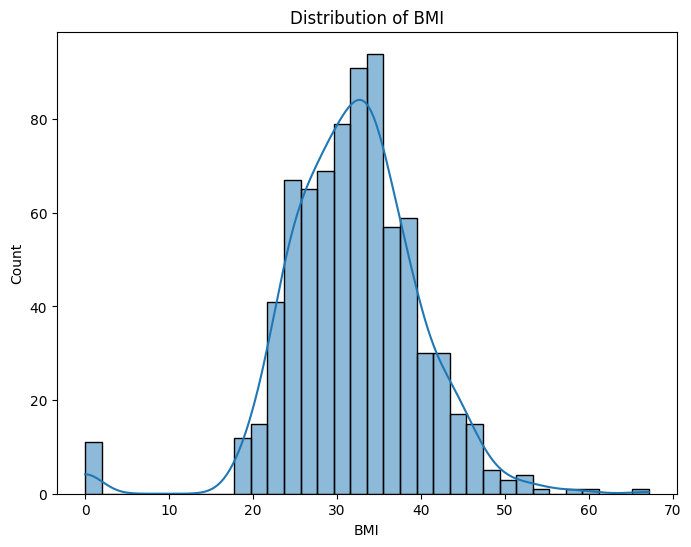

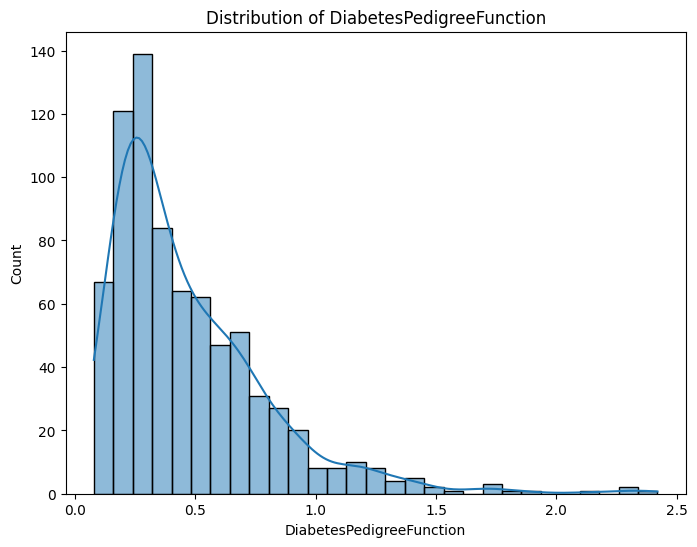

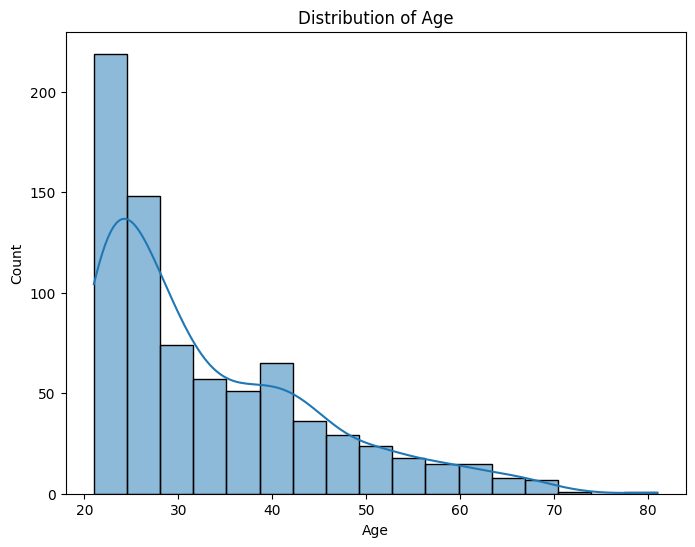

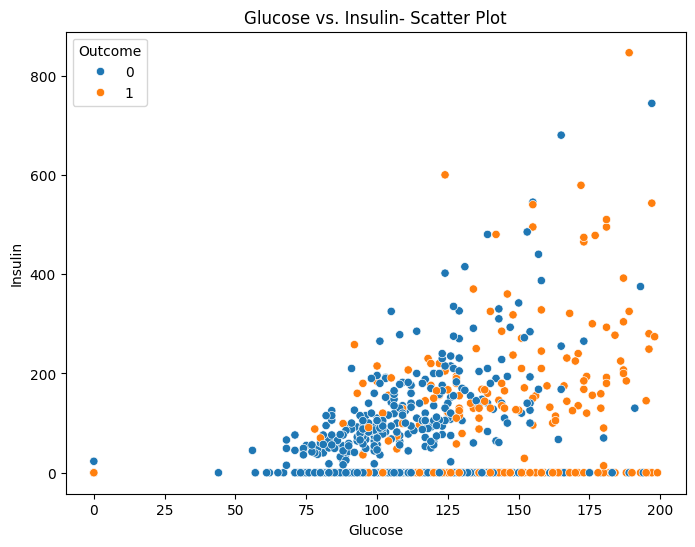

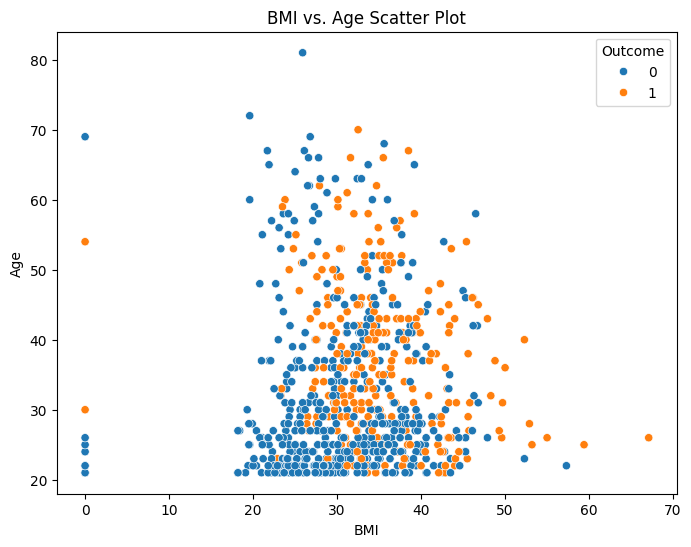

In [9]:


correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Box Plot of {column} vs. Outcome')
    plt.show()

for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df)
plt.title('Glucose vs. Insulin- Scatter Plot')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=df)
plt.title('BMI vs. Age Scatter Plot')
plt.show()


In [11]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']


print(X.head())
print(y.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [12]:
#7) Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
#8) Build the Decision Tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# 9) Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report :\n", classification_report(y_test, y_pred))
print(f'Accuracy is : {accuracy}')

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Accuracy is : 0.7467532467532467


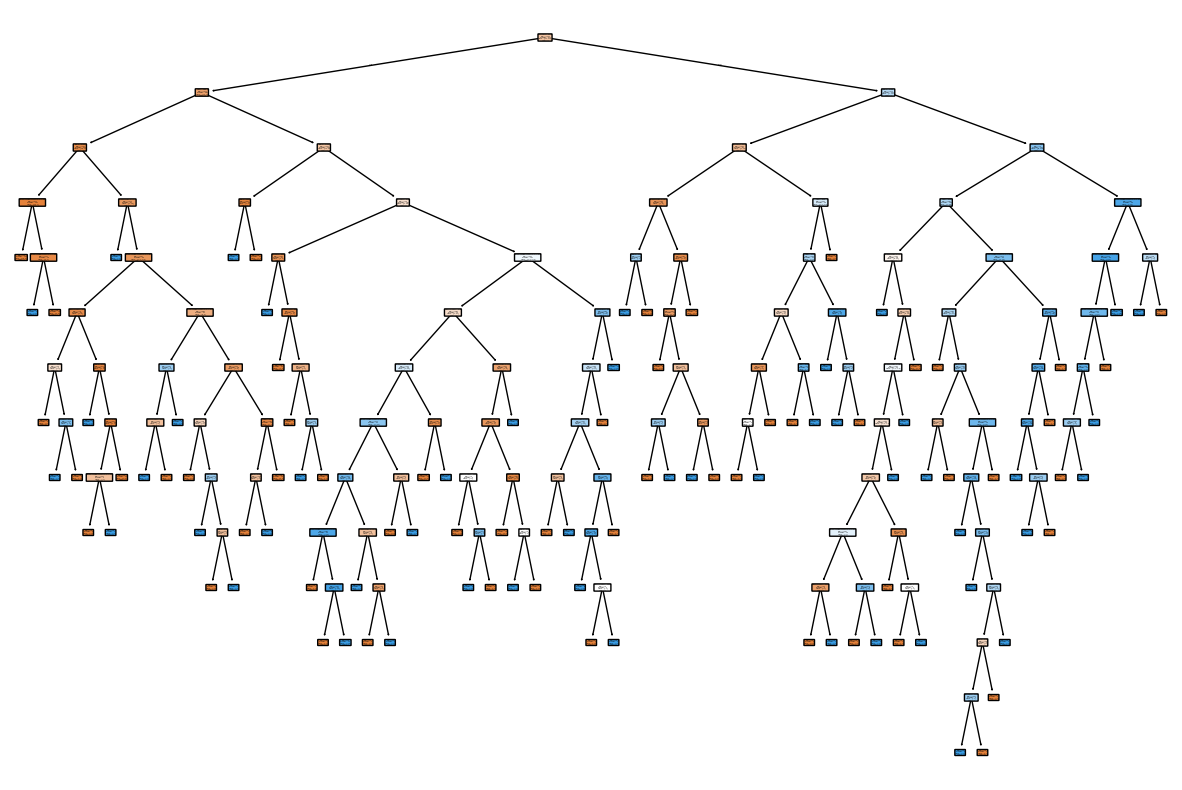

In [18]:
# 10) Visualize the DT
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [20]:
# 11) Optimize the DT using other criterion like entropy for Information Gain (default is gini index)

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report :\n", classification_report(y_test, y_pred))
print(f'Accuracy is : {accuracy}')

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Accuracy is : 0.7207792207792207


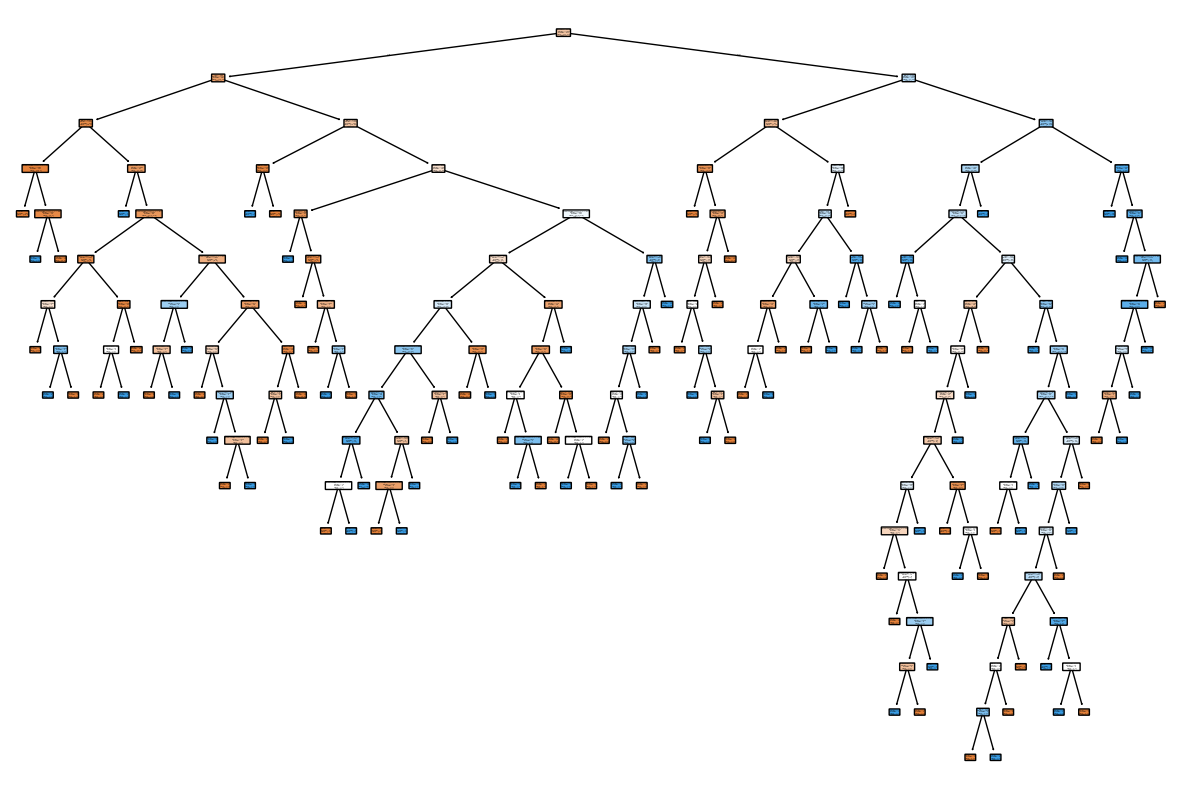

In [21]:
# 12) Build and visualize the DT again using the new criterion
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

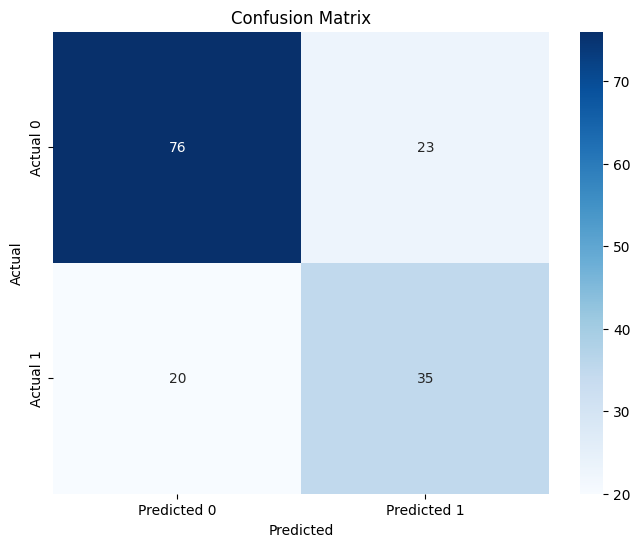

Precision: 0.60
Recall: 0.64
F1-score: 0.62


In [24]:
# prompt: 13) Find the model performance ( plot the confusion matrix and find the precision, recall, and fscore)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming 'y_test' and 'y_pred' are already defined from the previous code.

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
